In [1]:
#tensor1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Simple linear regression

In [2]:
simple_regression = np.loadtxt('simple_regression.txt')
x_data = simple_regression[:,1]
y_data = simple_regression[:,0]

simple_regression 

array([[50.496375,  7.312312],
       [69.017336,  9.94901 ],
       [ 6.504676,  0.402668],
       [47.202416,  7.372892],
       [40.42739 ,  5.413481],
       [15.258608,  1.689084],
       [32.444642,  4.89831 ],
       [51.332003,  7.443845],
       [30.384774,  4.409411],
       [11.333958,  2.317807],
       [14.756302,  2.439615],
       [67.13818 ,  9.791725],
       [62.027474,  9.515288],
       [30.262427,  4.384508],
       [24.907328,  3.238266],
       [49.818682,  6.639022],
       [31.089285,  4.104561],
       [37.437399,  4.86235 ],
       [45.713274,  6.301314],
       [20.135743,  3.134608],
       [35.496204,  5.385869],
       [35.217918,  4.491739],
       [-2.462339,  0.328581],
       [15.504408,  1.957047],
       [ 8.540072,  0.986557],
       [62.464219,  8.944165],
       [29.169664,  4.514209],
       [37.718168,  5.217733],
       [14.635353,  1.504053],
       [ 9.71068 ,  1.362839],
       [55.952296,  7.431248],
       [40.06951 ,  5.040947],
       [

In [3]:
with tf.Graph().as_default() as simple_regression:
    X = tf.placeholder(tf.float32, [None], name='X')
    Y = tf.placeholder(tf.float32, [None], name='Y')
    lr = tf.constant(5.5e-3, tf.float32)
    W = tf.get_variable("W", dtype=tf.float32, initializer=tf.constant(1., tf.float32))
    b = tf.get_variable("b", dtype=tf.float32, initializer=tf.constant(1., tf.float32))
    
    h = W*X + b
    cost = tf.reduce_mean(tf.square(tf.subtract(h, Y)))
    train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

In [4]:
with tf.Session(graph=simple_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        _, l = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        print("loss ", l)
        
    W_, b_ = sess.run([W, b])
    print(W_, b_ )

loss  1090.7887
loss  461.67645
loss  198.80078
loss  88.95547
loss  43.05312
loss  23.869057
loss  15.849133
loss  12.494084
loss  11.088279
loss  10.496966
loss  10.246005
loss  10.137276
loss  10.087998
loss  10.06358
loss  10.049568
loss  10.039928
loss  10.032127
loss  10.025117
loss  10.018452
loss  10.011953
loss  10.005542
loss  9.999186
loss  9.992869
loss  9.986586
loss  9.98034
loss  9.974123
loss  9.967935
loss  9.961782
loss  9.955657
loss  9.949562
loss  9.943498
loss  9.937464
loss  9.93146
loss  9.925485
loss  9.919541
loss  9.913627
loss  9.90774
loss  9.901884
loss  9.896054
loss  9.890257
loss  9.884485
loss  9.878743
loss  9.873031
loss  9.867346
loss  9.861688
loss  9.856061
loss  9.85046
loss  9.844885
loss  9.839337
loss  9.83382
loss  9.828332
loss  9.822866
loss  9.8174305
loss  9.812017
loss  9.806638
loss  9.80128
loss  9.795947
loss  9.790647
loss  9.785373
loss  9.780117
loss  9.774893
loss  9.769695
loss  9.764519
loss  9.759375
loss  9.75425
loss  9.74915

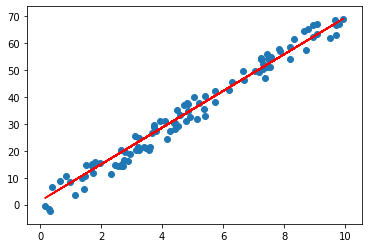

6.8131227 1.3594157


In [5]:
plt.plot(x_data, x_data*W_ + b_, 'r')
plt.scatter(x_data, y_data)
plt.show()
print(W_, b_)

# Multiple Regression

In [6]:
multi_x, multi_y = [], []
multi_raw = np.loadtxt('multi_regression.txt')
multi_y = multi_raw[:,2]
multi_x = multi_raw[:,:2]
multi_raw

array([[1., 0., 1.],
       [0., 2., 2.],
       [3., 0., 3.],
       [0., 4., 4.],
       [5., 0., 5.]])

In [7]:
with tf.Graph().as_default() as multi_regression:
    num_x = 2
    X = tf.placeholder(tf.float32, [None, num_x], name='X')
    Y = tf.placeholder(tf.float32, [None], name='Y')
    lr = tf.constant(1e-3, tf.float32)
    W = tf.get_variable("W", [1, num_x], tf.float32)
    b = tf.get_variable("b", dtype=tf.float32, initializer=tf.constant(1., tf.float32))
    
    h = tf.matmul(W, X, transpose_b=True) + b
    cost = tf.reduce_mean(tf.square(tf.subtract(h, Y)))
    train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [9]:
with tf.Session(graph=multi_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        _, l = sess.run([train, cost], feed_dict={X:multi_x, Y:multi_y})
        print("loss ", l)
    W_multi, b_multi = sess.run([W, b])
    print(W_multi, b_multi)

loss  36.496277
loss  35.527504
loss  34.5859
loss  33.670673
loss  32.781075
loss  31.916357
loss  31.075817
loss  30.258755
loss  29.464502
loss  28.692402
loss  27.941814
loss  27.212128
loss  26.502743
loss  25.81308
loss  25.14257
loss  24.490673
loss  23.856852
loss  23.24059
loss  22.641388
loss  22.058758
loss  21.49223
loss  20.941341
loss  20.405651
loss  19.884726
loss  19.378138
loss  18.885489
loss  18.40638
loss  17.940424
loss  17.487251
loss  17.046497
loss  16.61781
loss  16.200848
loss  15.795279
loss  15.400783
loss  15.017042
loss  14.643759
loss  14.280632
loss  13.927378
loss  13.583719
loss  13.249382
loss  12.924106
loss  12.607635
loss  12.299726
loss  12.000129
loss  11.708621
loss  11.424968
loss  11.148953
loss  10.880362
loss  10.618985
loss  10.364621
loss  10.117076
loss  9.876158
loss  9.641681
loss  9.4134655
loss  9.191339
loss  8.97513
loss  8.764673
loss  8.559812
loss  8.360387
loss  8.16625
loss  7.9772544
loss  7.7932563
loss  7.6141176
loss  7.43

loss  0.43740845
loss  0.43713802
loss  0.43686756
loss  0.43659753
loss  0.4363276
loss  0.43605796
loss  0.43578848
loss  0.4355193
loss  0.43525034
loss  0.43498144
loss  0.4347129
loss  0.43444458
loss  0.43417645
loss  0.4339086
loss  0.43364096
loss  0.43337345
loss  0.43310612
loss  0.4328391
loss  0.4325723
loss  0.43230572
loss  0.43203932
loss  0.43177304
loss  0.43150696
loss  0.43124133
loss  0.43097562
loss  0.43071026
loss  0.4304451
loss  0.43018016
loss  0.42991528
loss  0.4296507
loss  0.42938638
loss  0.4291222
loss  0.4288582
loss  0.4285945
loss  0.42833084
loss  0.42806736
loss  0.42780432
loss  0.42754132
loss  0.42727846
loss  0.42701587
loss  0.42675352
loss  0.42649126
loss  0.4262293
loss  0.4259674
loss  0.42570573
loss  0.42544428
loss  0.42518312
loss  0.42492184
loss  0.42466116
loss  0.4244004
loss  0.42413983
loss  0.42387944
loss  0.42361945
loss  0.4233594
loss  0.42309958
loss  0.42284006
loss  0.42258066
loss  0.42232147
loss  0.42206234
loss  0.4218

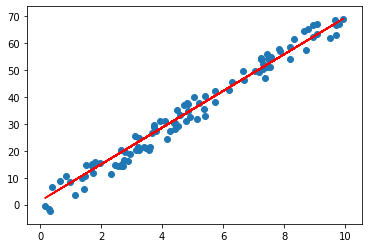

In [10]:
plt.plot(x_data, x_data*W_ + b_, 'r')
plt.scatter(x_data, y_data)
plt.show()

In [11]:
for j in range(len(multi_x)):
    sum = 0
    for i in range(2):
        sum += W_multi[0][i] * multi_x[j,i]
    print(multi_y[j], sum+b_multi)
print(W_multi, b_multi)

1.0 2.0245099663734436
2.0 2.5223827362060547
3.0 3.293860375881195
4.0 3.6549307107925415
5.0 4.5632107853889465
[[0.6346752 0.566274 ]] 1.3898348


# Logistic Regression

In [12]:
logistic = np.loadtxt('logistic_regression.txt')
logistic_x = logistic[:,:-1]
logistic_y = logistic[:,-1]

In [13]:
with tf.Graph().as_default() as logistic_regression:
    num_x = len(logistic_x[0])
    X = tf.placeholder(tf.float32, [None, num_x], name='X')
    Y = tf.placeholder(tf.float32, [None], name='Y')
    lr = tf.constant(1e-1, tf.float32)
    W = tf.get_variable("W", [1, num_x], tf.float32)
    b = tf.get_variable("b", dtype=tf.float32, initializer=tf.constant(1., tf.float32))
    
    h = tf.matmul(W, X, transpose_b=True) + b
    hypothesis = tf.sigmoid(h)
    cost = -tf.reduce_mean((1-Y) * tf.log(hypothesis) + Y * tf.log(1-hypothesis))
    train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [14]:
with tf.Session(graph=logistic_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        _, l = sess.run([train, cost], feed_dict={X:logistic_x, Y:logistic_y})
        print("loss ", l)
    W_logistic, b_logistic = sess.run([W, b])

loss  1.2929631
loss  1.0174282
loss  0.80072784
loss  0.6586429
loss  0.58497983
loss  0.5537426
loss  0.5403517
loss  0.5324763
loss  0.5261044
loss  0.52024543
loss  0.51468414
loss  0.50936955
loss  0.5042827
loss  0.499411
loss  0.494743
loss  0.4902682
loss  0.48597667
loss  0.48185864
loss  0.47790512
loss  0.4741073
loss  0.47045696
loss  0.4669464
loss  0.46356806
loss  0.46031502
loss  0.4571805
loss  0.45415834
loss  0.4512426
loss  0.44842747
loss  0.44570795
loss  0.44307896
loss  0.44053558
loss  0.43807364
loss  0.43568876
loss  0.43337706
loss  0.4311348
loss  0.42895845
loss  0.42684475
loss  0.4247905
loss  0.42279282
loss  0.42084894
loss  0.4189562
loss  0.4171121
loss  0.41531458
loss  0.41356114
loss  0.41184983
loss  0.41017878
loss  0.408546
loss  0.4069499
loss  0.40538874
loss  0.40386114
loss  0.40236545
loss  0.40090033
loss  0.39946458
loss  0.39805686
loss  0.3966761
loss  0.39532116
loss  0.393991
loss  0.39268467
loss  0.3914012
loss  0.39013967
loss  0.

loss  0.22062935
loss  0.22050275
loss  0.22037649
loss  0.22025053
loss  0.22012474
loss  0.2199993
loss  0.21987408
loss  0.2197491
loss  0.21962436
loss  0.21949996
loss  0.21937586
loss  0.21925193
loss  0.21912825
loss  0.21900491
loss  0.21888174
loss  0.21875887
loss  0.21863623
loss  0.21851385
loss  0.21839176
loss  0.2182699
loss  0.21814823
loss  0.21802688
loss  0.21790576
loss  0.21778488
loss  0.21766429
loss  0.21754389
loss  0.21742372
loss  0.21730383
loss  0.21718419
loss  0.2170648
loss  0.2169456
loss  0.21682668
loss  0.21670793
loss  0.21658947
loss  0.2164713
loss  0.2163533
loss  0.21623553
loss  0.21611802
loss  0.21600069
loss  0.21588369
loss  0.21576683
loss  0.21565025
loss  0.2155339
loss  0.21541774
loss  0.21530183
loss  0.21518607
loss  0.21507071
loss  0.21495546
loss  0.21484046
loss  0.21472569
loss  0.21461105
loss  0.21449679
loss  0.21438265
loss  0.2142688
loss  0.21415506
loss  0.21404159
loss  0.21392834
loss  0.21381532
loss  0.21370251
loss  

loss  0.17308688
loss  0.17302935
loss  0.17297192
loss  0.17291455
loss  0.1728573
loss  0.17279994
loss  0.1727428
loss  0.17268564
loss  0.17262852
loss  0.17257147
loss  0.17251448
loss  0.1724575
loss  0.17240064
loss  0.17234379
loss  0.172287
loss  0.17223023
loss  0.17217351
loss  0.17211695
loss  0.17206025
loss  0.17200375
loss  0.17194729
loss  0.17189084
loss  0.17183441
loss  0.17177813
loss  0.17172182
loss  0.17166555
loss  0.17160939
loss  0.17155324
loss  0.17149717
loss  0.17144108
loss  0.17138515
loss  0.17132916
loss  0.17127323
loss  0.1712174
loss  0.17116158
loss  0.1711059
loss  0.17105012
loss  0.17099452
loss  0.17093895
loss  0.17088337
loss  0.17082782
loss  0.17077242
loss  0.17071705
loss  0.1706617
loss  0.17060637
loss  0.17055112
loss  0.17049587
loss  0.17044075
loss  0.1703856
loss  0.17033054
loss  0.17027546
loss  0.17022057
loss  0.17016561
loss  0.1701107
loss  0.17005591
loss  0.1700011
loss  0.16994643
loss  0.16989173
loss  0.1698371
loss  0.1

loss  0.14633147
loss  0.14629342
loss  0.14625534
loss  0.14621739
loss  0.1461794
loss  0.14614142
loss  0.1461035
loss  0.14606552
loss  0.14602764
loss  0.14598978
loss  0.14595194
loss  0.14591412
loss  0.14587624
loss  0.1458385
loss  0.14580072
loss  0.14576298
loss  0.14572525
loss  0.14568754
loss  0.1456498
loss  0.14561218
loss  0.14557455
loss  0.14553688
loss  0.1454993
loss  0.14546174
loss  0.14542414
loss  0.1453866
loss  0.14534913
loss  0.14531167
loss  0.14527412
loss  0.14523669
loss  0.14519928
loss  0.14516188
loss  0.14512447
loss  0.14508711
loss  0.14504978
loss  0.14501244
loss  0.14497513
loss  0.14493786
loss  0.14490058
loss  0.14486335
loss  0.14482613
loss  0.1447889
loss  0.14475173
loss  0.14471462
loss  0.14467745
loss  0.14464037
loss  0.14460324
loss  0.1445662
loss  0.14452912
loss  0.14449209
loss  0.14445509
loss  0.14441808
loss  0.14438112
loss  0.14434412
loss  0.14430726
loss  0.14427032
loss  0.14423347
loss  0.14419653
loss  0.14415972
loss 

loss  0.12771572
loss  0.12768711
loss  0.12765844
loss  0.12762979
loss  0.12760119
loss  0.12757255
loss  0.127544
loss  0.1275154
loss  0.12748677
loss  0.12745824
loss  0.1274297
loss  0.12740111
loss  0.12737264
loss  0.12734412
loss  0.12731558
loss  0.12728705
loss  0.1272586
loss  0.12723012
loss  0.12720169
loss  0.12717326
loss  0.12714483
loss  0.1271164
loss  0.127088
loss  0.12705961
loss  0.12703125
loss  0.12700284
loss  0.12697454
loss  0.12694615
loss  0.12691784
loss  0.12688951
loss  0.1268612
loss  0.12683289
loss  0.12680471
loss  0.1267764
loss  0.12674816
loss  0.1267199
loss  0.1266917
loss  0.12666343
loss  0.12663525
loss  0.12660706
loss  0.12657888
loss  0.12655073
loss  0.12652259
loss  0.12649444
loss  0.12646629
loss  0.12643819
loss  0.12641005
loss  0.12638196
loss  0.12635389
loss  0.12632582
loss  0.12629773
loss  0.12626973
loss  0.12624168
loss  0.12621368
loss  0.12618566
loss  0.12615769
loss  0.12612969
loss  0.12610175
loss  0.12607375
loss  0.1

loss  0.11317899
loss  0.11315627
loss  0.11313359
loss  0.11311088
loss  0.11308818
loss  0.11306549
loss  0.11304286
loss  0.113020115
loss  0.112997465
loss  0.112974845
loss  0.1129522
loss  0.11292958
loss  0.11290691
loss  0.112884335
loss  0.112861715
loss  0.1128391
loss  0.112816565
loss  0.11279393
loss  0.11277139
loss  0.11274887
loss  0.11272631
loss  0.11270366
loss  0.11268119
loss  0.11265864
loss  0.11263612
loss  0.112613566
loss  0.112591065
loss  0.11256862
loss  0.11254612
loss  0.112523615
loss  0.11250118
loss  0.1124787
loss  0.11245623
loss  0.11243377
loss  0.11241132
loss  0.11238891
loss  0.11236655
loss  0.11234414
loss  0.112321734
loss  0.1122993
loss  0.11227689
loss  0.11225453
loss  0.112232156
loss  0.1122098
loss  0.11218747
loss  0.11216507
loss  0.11214278
loss  0.11212043
loss  0.11209812
loss  0.11207578
loss  0.11205351
loss  0.11203119
loss  0.11200894
loss  0.111986615
loss  0.11196438
loss  0.111942135
loss  0.11191984
loss  0.111897625
loss 

loss  0.10151759
loss  0.10149899
loss  0.10148045
loss  0.101461925
loss  0.10144337
loss  0.10142485
loss  0.101406306
loss  0.101387806
loss  0.10136932
loss  0.101350814
loss  0.10133231
loss  0.10131378
loss  0.10129532
loss  0.10127679
loss  0.10125837
loss  0.10123987
loss  0.10122142
loss  0.10120296
loss  0.10118454
loss  0.10116605
loss  0.10114769
loss  0.101129174
loss  0.101110816
loss  0.10109237
loss  0.10107401
loss  0.10105554
loss  0.10103715
loss  0.10101876
loss  0.10100039
loss  0.10098198
loss  0.10096365
loss  0.10094526
loss  0.1009269
loss  0.10090857
loss  0.10089018
loss  0.100871824
loss  0.10085348
loss  0.10083515
loss  0.10081687
loss  0.10079854
loss  0.1007802
loss  0.10076193
loss  0.100743614
loss  0.10072529
loss  0.10070702
loss  0.10068872
loss  0.100670464
loss  0.100652136
loss  0.10063394
loss  0.10061562
loss  0.10059739
loss  0.10057918
loss  0.10056088
loss  0.1005427
loss  0.100524455
loss  0.100506224
loss  0.100488
loss  0.10046982
loss  0

loss  0.0919135
loss  0.091898
loss  0.09188256
loss  0.09186709
loss  0.091851674
loss  0.09183625
loss  0.09182083
loss  0.09180537
loss  0.09178996
loss  0.091774546
loss  0.09175909
loss  0.09174371
loss  0.09172834
loss  0.0917129
loss  0.09169752
loss  0.09168214
loss  0.091666736
loss  0.09165139
loss  0.09163603
loss  0.09162066
loss  0.09160521
loss  0.091589846
loss  0.09157454
loss  0.09155918
loss  0.09154385
loss  0.09152845
loss  0.09151312
loss  0.091497846
loss  0.09148251
loss  0.091467164
loss  0.09145186
loss  0.091436476
loss  0.09142122
loss  0.09140592
loss  0.09139059
loss  0.0913753
loss  0.091359995
loss  0.09134474
loss  0.09132943
loss  0.09131416
loss  0.0912989
loss  0.09128361
loss  0.09126836
loss  0.09125314
loss  0.09123781
loss  0.091222614
loss  0.091207325
loss  0.091192126
loss  0.091176905
loss  0.09116163
loss  0.09114646
loss  0.09113124
loss  0.09111602
loss  0.09110081
loss  0.09108555
loss  0.09107036
loss  0.09105519
loss  0.09103996
loss  0.

loss  0.083646
loss  0.08363297
loss  0.083619945
loss  0.08360695
loss  0.083593965
loss  0.08358102
loss  0.08356803
loss  0.083555005
loss  0.08354207
loss  0.08352906
loss  0.08351609
loss  0.08350313
loss  0.083490185
loss  0.0834772
loss  0.083464235
loss  0.0834513
loss  0.083438374
loss  0.08342538
loss  0.08341247
loss  0.083399564
loss  0.08338661
loss  0.08337369
loss  0.083360724
loss  0.08334779
loss  0.0833349
loss  0.083321966
loss  0.08330909
loss  0.08329617
loss  0.08328328
loss  0.08327032
loss  0.083257444
loss  0.08324462
loss  0.08323168
loss  0.08321876
loss  0.0832059
loss  0.083193034
loss  0.083180174
loss  0.0831673
loss  0.08315444
loss  0.08314154
loss  0.0831287
loss  0.08311585
loss  0.083102986
loss  0.083090134
loss  0.08307735
loss  0.08306442
loss  0.083051614
loss  0.08303874
loss  0.083025955
loss  0.08301311
loss  0.083000295
loss  0.08298745
loss  0.08297461
loss  0.082961835
loss  0.08294898
loss  0.082936235
loss  0.082923464
loss  0.08291059
lo

loss  0.07679159
loss  0.07678047
loss  0.07676935
loss  0.07675824
loss  0.07674711
loss  0.07673604
loss  0.07672492
loss  0.07671384
loss  0.07670275
loss  0.076691665
loss  0.07668056
loss  0.07666945
loss  0.076658376
loss  0.076647274
loss  0.07663626
loss  0.07662517
loss  0.076614104
loss  0.07660305
loss  0.07659199
loss  0.07658092
loss  0.07656986
loss  0.07655882
loss  0.07654774
loss  0.076536715
loss  0.07652567
loss  0.07651458
loss  0.07650355
loss  0.07649245
loss  0.0764815
loss  0.07647046
loss  0.07645943
loss  0.07644842
loss  0.07643737
loss  0.076426364
loss  0.07641537
loss  0.07640436
loss  0.076393284
loss  0.07638232
loss  0.07637129
loss  0.076360345
loss  0.076349325
loss  0.07633831
loss  0.07632731
loss  0.07631636
loss  0.07630535
loss  0.076294385
loss  0.07628339
loss  0.07627242
loss  0.07626145
loss  0.07625043
loss  0.07623947
loss  0.07622852
loss  0.07621753
loss  0.07620658
loss  0.07619562
loss  0.07618463
loss  0.07617366
loss  0.07616278
loss 

loss  0.070807956
loss  0.070798375
loss  0.07078886
loss  0.07077927
loss  0.07076969
loss  0.07076017
loss  0.070750594
loss  0.07074105
loss  0.070731476
loss  0.070721924
loss  0.07071238
loss  0.07070286
loss  0.070693314
loss  0.07068376
loss  0.07067417
loss  0.070664674
loss  0.070655115
loss  0.07064557
loss  0.070636064
loss  0.07062653
loss  0.07061697
loss  0.070607446
loss  0.070597954
loss  0.07058844
loss  0.0705789
loss  0.07056944
loss  0.07055988
loss  0.07055038
loss  0.07054088
loss  0.0705314
loss  0.0705219
loss  0.07051238
loss  0.07050288
loss  0.07049335
loss  0.07048386
loss  0.07047442
loss  0.07046491
loss  0.070455395
loss  0.07044594
loss  0.07043647
loss  0.07042698
loss  0.0704175
loss  0.07040802
loss  0.0703986
loss  0.07038911
loss  0.07037962
loss  0.07037016
loss  0.07036073
loss  0.07035125
loss  0.07034181
loss  0.07033231
loss  0.070322864
loss  0.07031344
loss  0.07030397
loss  0.07029454
loss  0.070285074
loss  0.07027563
loss  0.07026624
loss 

loss  0.06567362
loss  0.06566527
loss  0.06565699
loss  0.06564869
loss  0.06564034
loss  0.06563204
loss  0.0656237
loss  0.06561539
loss  0.06560709
loss  0.06559875
loss  0.06559047
loss  0.06558216
loss  0.06557382
loss  0.065565586
loss  0.06555725
loss  0.06554895
loss  0.065540664
loss  0.065532334
loss  0.065524094
loss  0.06551579
loss  0.065507494
loss  0.06549921
loss  0.065490924
loss  0.06548264
loss  0.06547437
loss  0.0654661
loss  0.06545783
loss  0.06544954
loss  0.06544122
loss  0.06543299
loss  0.06542468
loss  0.065416396
loss  0.06540814
loss  0.0653999
loss  0.06539167
loss  0.06538343
loss  0.06537513
loss  0.065366894
loss  0.06535864
loss  0.0653503
loss  0.065342076
loss  0.06533385
loss  0.06532561
loss  0.06531738
loss  0.065309115
loss  0.06530088
loss  0.065292634
loss  0.06528444
loss  0.0652762
loss  0.06526793
loss  0.06525978
loss  0.06525147
loss  0.06524327
loss  0.06523504
loss  0.06522682
loss  0.06521856
loss  0.06521035
loss  0.06520217
loss  0.

loss  0.06121138
loss  0.061204087
loss  0.06119674
loss  0.06118947
loss  0.061182156
loss  0.06117488
loss  0.061167587
loss  0.061160292
loss  0.061152965
loss  0.061145727
loss  0.061138447
loss  0.061131123
loss  0.06112383
loss  0.061116543
loss  0.06110929
loss  0.061101984
loss  0.061094686
loss  0.061087444
loss  0.06108013
loss  0.061072867
loss  0.061065566
loss  0.06105827
loss  0.06105104
loss  0.0610438
loss  0.06103651
loss  0.061029185
loss  0.061021965
loss  0.06101476
loss  0.061007474
loss  0.06100017
loss  0.060992938
loss  0.060985714
loss  0.060978413
loss  0.060971137
loss  0.0609639
loss  0.060956653
loss  0.060949374
loss  0.060942117
loss  0.06093493
loss  0.06092767
loss  0.060920406
loss  0.060913187
loss  0.060905952
loss  0.060898732
loss  0.060891498
loss  0.060884226
loss  0.060876984
loss  0.060869798
loss  0.06086248
loss  0.060855303
loss  0.06084807
loss  0.06084087
loss  0.060833644
loss  0.06082641
loss  0.060819183
loss  0.060812
loss  0.060804773

loss  0.05725028
loss  0.05724384
loss  0.05723739
loss  0.05723095
loss  0.057224486
loss  0.057218045
loss  0.057211578
loss  0.05720514
loss  0.05719875
loss  0.057192285
loss  0.05718583
loss  0.05717942
loss  0.05717297
loss  0.057166543
loss  0.057160098
loss  0.05715366
loss  0.057147264
loss  0.057140816
loss  0.0571344
loss  0.057127997
loss  0.05712153
loss  0.05711515
loss  0.057108726
loss  0.057102323
loss  0.057095867
loss  0.057089493
loss  0.05708303
loss  0.057076663
loss  0.05707021
loss  0.057063833
loss  0.057057407
loss  0.057051014
loss  0.05704457
loss  0.0570382
loss  0.057031784
loss  0.057025414
loss  0.057019006
loss  0.057012577
loss  0.057006206
loss  0.05699979
loss  0.056993376
loss  0.056986988
loss  0.05698061
loss  0.05697423
loss  0.056967806
loss  0.056961436
loss  0.05695507
loss  0.05694866
loss  0.05694228
loss  0.056935906
loss  0.056929532
loss  0.05692318
loss  0.056916773
loss  0.056910396
loss  0.056904003
loss  0.05689762
loss  0.056891304
l

loss  0.053714376
loss  0.05370863
loss  0.05370296
loss  0.053697214
loss  0.053691506
loss  0.053685766
loss  0.053680077
loss  0.05367433
loss  0.053668644
loss  0.05366291
loss  0.053657223
loss  0.053651493
loss  0.0536458
loss  0.053640053
loss  0.053634346
loss  0.05362864
loss  0.05362296
loss  0.053617254
loss  0.053611565
loss  0.053605873
loss  0.05360013
loss  0.05359445
loss  0.053588763
loss  0.053583052
loss  0.053577363
loss  0.05357166
loss  0.05356598
loss  0.05356032
loss  0.053554576
loss  0.05354893
loss  0.053543214
loss  0.053537514
loss  0.05353181
loss  0.053526144
loss  0.053520445
loss  0.053514805
loss  0.053509098
loss  0.053503424
loss  0.053497713
loss  0.053492043
loss  0.053486377
loss  0.053480696
loss  0.05347499
loss  0.05346933
loss  0.05346367
loss  0.053458005
loss  0.0534523
loss  0.053446636
loss  0.053440988
loss  0.053435296
loss  0.05342963
loss  0.05342396
loss  0.05341828
loss  0.05341265
loss  0.053406987
loss  0.053401332
loss  0.05339566

loss  0.050516237
loss  0.05051115
loss  0.050506044
loss  0.05050096
loss  0.050495896
loss  0.050490756
loss  0.050485637
loss  0.05048056
loss  0.05047548
loss  0.0504704
loss  0.050465316
loss  0.05046023
loss  0.050455134
loss  0.05045004
loss  0.05044493
loss  0.050439864
loss  0.05043478
loss  0.050429683
loss  0.050424606
loss  0.050419584
loss  0.050414454
loss  0.050409395
loss  0.05040432
loss  0.050399225
loss  0.050394174
loss  0.050389066
loss  0.050384004
loss  0.050378937
loss  0.05037388
loss  0.050368782
loss  0.0503637
loss  0.05035861
loss  0.050353587
loss  0.05034851
loss  0.050343435
loss  0.050338373
loss  0.05033326
loss  0.05032822
loss  0.0503232
loss  0.050318103
loss  0.050313044
loss  0.050308015
loss  0.050302964
loss  0.050297905
loss  0.05029281
loss  0.050287783
loss  0.05028275
loss  0.05027767
loss  0.050272584
loss  0.05026759
loss  0.050262544
loss  0.050257463
loss  0.050252378
loss  0.05024733
loss  0.050242323
loss  0.05023725
loss  0.05023219
l

loss  0.047554042
loss  0.04754949
loss  0.047544926
loss  0.047540367
loss  0.047535837
loss  0.047531277
loss  0.047526736
loss  0.047522213
loss  0.047517654
loss  0.047513116
loss  0.047508564
loss  0.047503993
loss  0.04749949
loss  0.047494948
loss  0.04749039
loss  0.04748587
loss  0.0474813
loss  0.04747675
loss  0.04747222
loss  0.047467735
loss  0.047463175
loss  0.047458652
loss  0.047454108
loss  0.04744959
loss  0.04744503
loss  0.047440544
loss  0.047435984
loss  0.047431488
loss  0.047426928
loss  0.04742245
loss  0.04741789
loss  0.047413398
loss  0.047408845
loss  0.04740435
loss  0.047399804
loss  0.04739527
loss  0.047390748
loss  0.047386225
loss  0.0473817
loss  0.047377188
loss  0.047372643
loss  0.04736817
loss  0.047363635
loss  0.047359157
loss  0.047354665
loss  0.047350112
loss  0.047345612
loss  0.047341105
loss  0.047336567
loss  0.047332063
loss  0.04732756
loss  0.047323078
loss  0.047318548
loss  0.04731402
loss  0.047309533
loss  0.047305048
loss  0.047

loss  0.044965114
loss  0.04496104
loss  0.044956952
loss  0.044952873
loss  0.04494877
loss  0.044944704
loss  0.044940624
loss  0.044936493
loss  0.04493246
loss  0.044928357
loss  0.044924278
loss  0.044920206
loss  0.04491611
loss  0.044912044
loss  0.04490796
loss  0.044903863
loss  0.044899773
loss  0.04489569
loss  0.04489164
loss  0.044887554
loss  0.04488344
loss  0.044879396
loss  0.044875305
loss  0.04487117
loss  0.04486714
loss  0.044863056
loss  0.044858977
loss  0.044854898
loss  0.044850826
loss  0.044846784
loss  0.04484272
loss  0.044838626
loss  0.04483457
loss  0.044830516
loss  0.04482646
loss  0.04482238
loss  0.044818327
loss  0.04481426
loss  0.04481019
loss  0.04480611
loss  0.04480204
loss  0.044797983
loss  0.044793922
loss  0.04478985
loss  0.044785816
loss  0.04478175
loss  0.04477768
loss  0.04477362
loss  0.044769574
loss  0.044765506
loss  0.044761438
loss  0.04475737
loss  0.04475334
loss  0.04474929
loss  0.044745196
loss  0.044741135
loss  0.04473709


In [15]:
for j in range(len(logistic_x)):
    sum_ = 0
    for i in range(3):
        sum_ += W_logistic[0][i] * logistic_x[j,i]
    print('label', logistic_y[j], 'probability', 1/(1+math.exp(sum_+b_)))
print(W_logistic, b_logistic)

label 0.0 probability 0.0015531132061617975
label 0.0 probability 0.1905500702584552
label 0.0 probability 0.9996969543168107
label 1.0 probability 0.9999984331491126
label 1.0 probability 0.9999990412903051
label 1.0 probability 0.9999967263055213
[[10.371641   -0.24561769 -4.773882  ]] 11.28696
